In [1]:
import pandas as pd
import numpy as np
import random 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv("../Data/titanic_data/train.csv")
test_df = pd.read_csv("../Data/titanic_data/test.csv")
submission = pd.read_csv("../Data/titanic_data/gender_submission.csv")

np.random.seed(1234)
random.seed(1234)

## 3.5 데이터 개요 파악

In [3]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [4]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [10]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3.6 데이터 시각화

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
plt.style.use("ggplot")

In [16]:
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [17]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [18]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [19]:
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()

<Axes: xlabel='Embarked'>

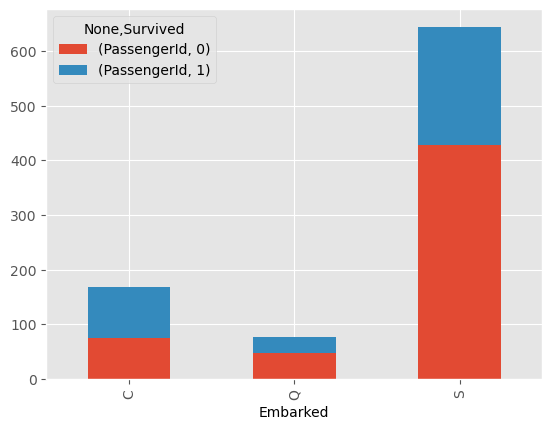

In [20]:
embarked_df.plot.bar(stacked=True)

In [21]:
embarked_df["survived_rate"] = embarked_df.iloc[:,0]/(embarked_df.iloc[:,0] + embarked_df.iloc[:,1])
print(embarked_df.iloc[:,0], embarked_df.iloc[:,1])

Embarked
C     75
Q     47
S    427
Name: (PassengerId, 0), dtype: int64 Embarked
C     93
Q     30
S    217
Name: (PassengerId, 1), dtype: int64


In [22]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

In [23]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()

<Axes: xlabel='Sex'>

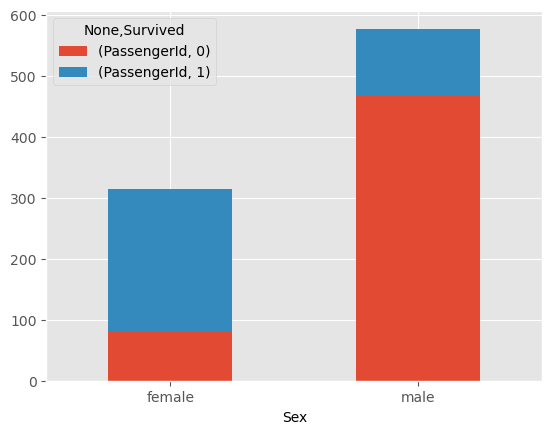

In [25]:
sex_df.plot.bar(stacked=True, rot=0)

In [26]:
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()


<Axes: xlabel='Pclass'>

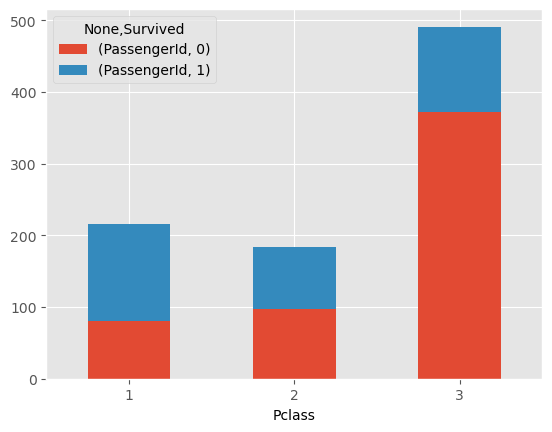

In [27]:
ticket_df.plot.bar(stacked=True, rot=0)

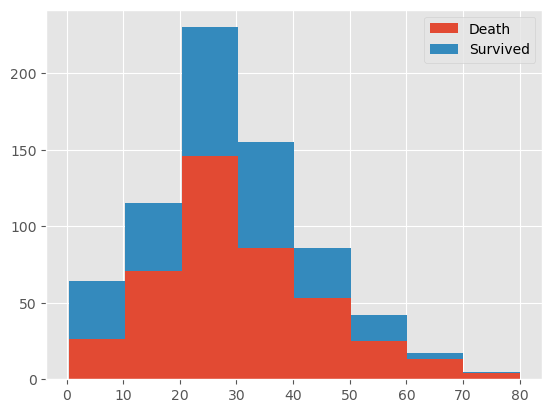

In [28]:
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]], bins=8, 
         histtype="barstacked", label=["Death", "Survived"])
plt.legend()


In [29]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])

In [30]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [31]:
train_corr = train_df_corr.corr(numeric_only=True)

In [32]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

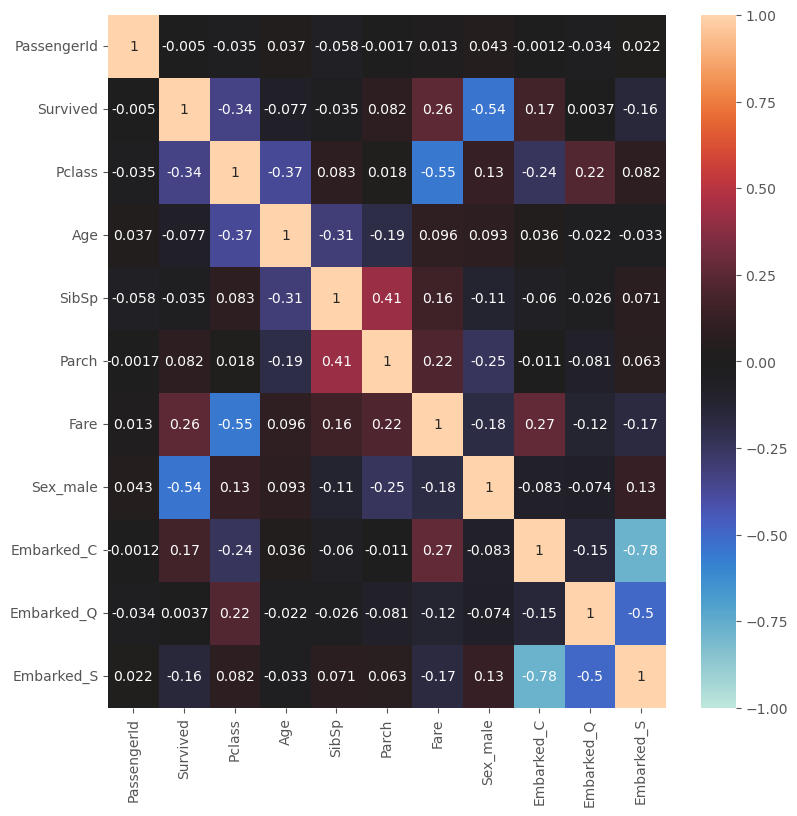

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

## 3.7 데이터 전처리와 특징 값 생성 

In [34]:
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)

In [35]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [37]:
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

In [38]:
Fare_mean.columns=["Pclass","Fare_mean"]

In [39]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [40]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")

all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis=1)

In [41]:
all_df["Name"].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [42]:
name_df = all_df["Name"].str.split("[,.]", 2, expand=True)

/tmp/ipykernel_1233870/2983891952.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  name_df = all_df["Name"].str.split("[,.]", 2, expand=True)


In [43]:
name_df.columns = ["family_name", "honorific", "Name"]

In [44]:
name_df 

,family_name,honorific,Name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [45]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["Name"] = name_df["Name"].str.strip()

In [46]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [47]:
all_df = pd.concat([all_df, name_df], axis=1)

In [48]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,Name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

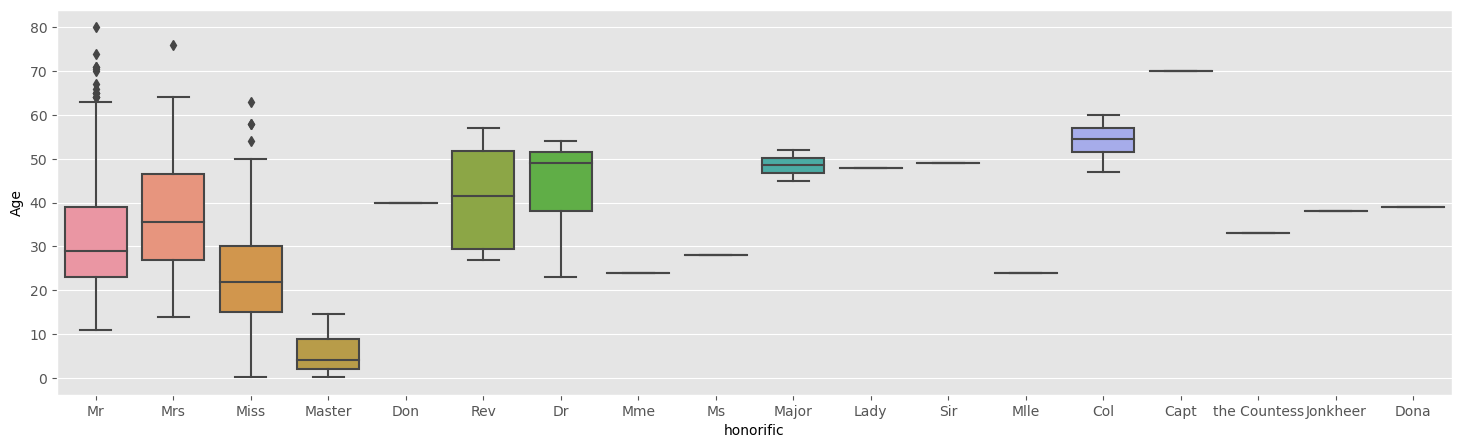

In [49]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [50]:
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [51]:
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df,name_df[0:len(test_df)].reset_index(drop=True)], axis=1)

<Axes: xlabel='honorific'>

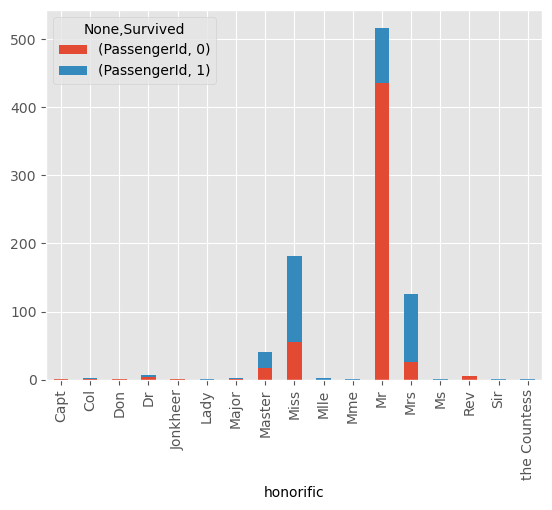

In [52]:
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [53]:
honorific_age_mean = all_df[["Age", "honorific"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis=1)

In [54]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [55]:
all_df.loc[all_df["family_num"]==0,"alone"] = 1
all_df["alone"].fillna(0, inplace=True)

In [56]:
all_df = all_df.drop(["PassengerId", "Name", "family_name", "Ticket", "Cabin"], axis=1)

In [57]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [58]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [59]:
all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mrs")  | (all_df["honorific"]=="Master")), "honorific"] = "other"

In [60]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder

all_df["Embarked"].fillna("missing", inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [62]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [63]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtype == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [64]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [65]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)


## 3.8 머신 러닝 모델링

In [66]:
import lightgbm as lgb

In [67]:
from sklearn.model_selection import train_test_split    
from sklearn.model_selection import KFold

In [68]:
x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [69]:
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]

In [70]:
lgb_train = lgb.Dataset(x_train, y_train, categorical_feature=categories, free_raw_data=False)
lgb_eval = lgb.Dataset(x_valid, y_valid, categorical_feature=categories, reference=lgb_train, free_raw_data=False)


In [71]:
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves":20,
    "min_data_in_leaf":57,
    "random_seed":1234
}


In [72]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/home/bbok0525/anaconda3/envs/default/lib/python3.10/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [73]:
model_lgb.feature_importance(
)

array([ 46,  13, 178,  19,   7, 266,  27,  33,  25,   5], dtype=int32)

<Axes: >

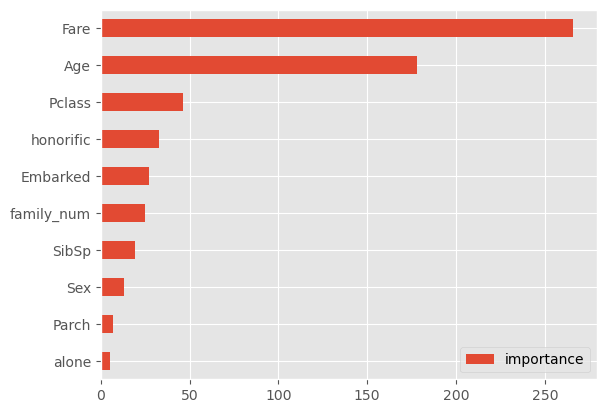

In [74]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=x_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

In [75]:
y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_valid, np.round(y_pred))

0.8491620111731844

In [78]:
folds = 3
kf = KFold(n_splits=folds)

In [79]:
models = []
acc = []
for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    lgb_train = lgb.Dataset(x_train, y_train, categorical_feature=categories, free_raw_data=False)
    ldb_eval = lgb.Dataset(x_valid, y_valid, categorical_feature=categories, reference=lgb_train, free_raw_data=False)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=-1,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    print("result:", accuracy_score(y_valid, np.round(y_pred)))
    models.append(model_lgb)

[LightGBM] [Warning] Cannot change max_bin after constructed Dataset handle.
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/home/bbok0525/anaconda3/envs/default/lib/python3.10/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/bbok0525/anaconda3/envs/default/lib/python3.10/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/bbok0525/anaconda3/envs/default/lib/python3.10/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [80]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [81]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [82]:
preds_int = (preds_mean > 0.5).astype(int)

In [83]:
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
submission.to_csv("../submit/titanic_submit01.csv", index=False)

## 3.10 정확도 이외의 여러가지 분석

In [86]:
train_df = pd.read_csv("../Data/titanic_data/train.csv")
test_df = pd.read_csv("../Data/titanic_data/test.csv")
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<Axes: >

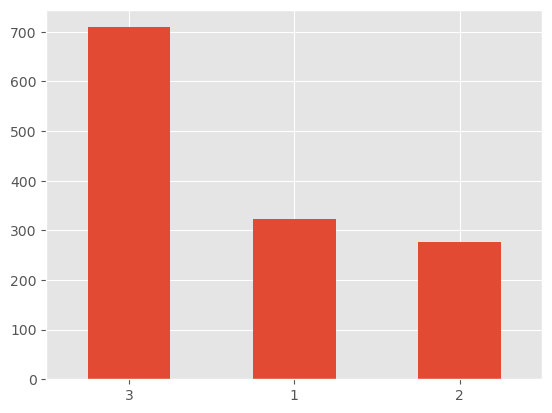

In [88]:
all_df.Pclass.value_counts().plot.bar(rot=0)

In [89]:
all_df[["Pclass", "Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<Axes: xlabel='Pclass', ylabel='Fare'>

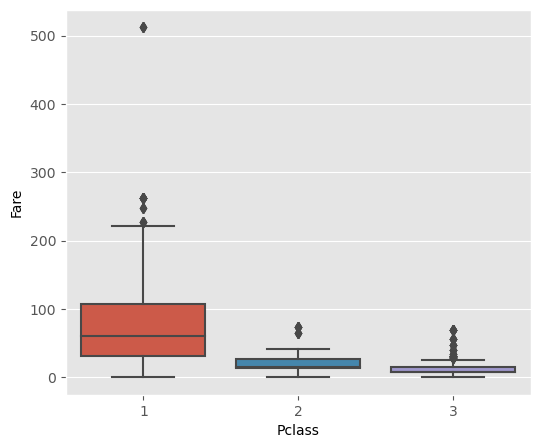

In [90]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass", y="Fare", data=all_df)

In [91]:
all_df["Pclass2"] = all_df["Pclass"]


In [92]:
all_df.loc[(all_df["Fare"]>108), "Pclass2"] = 0 
all_df[all_df["Pclass2"]==0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [93]:
all_df[["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<Axes: xlabel='Pclass2', ylabel='Age'>

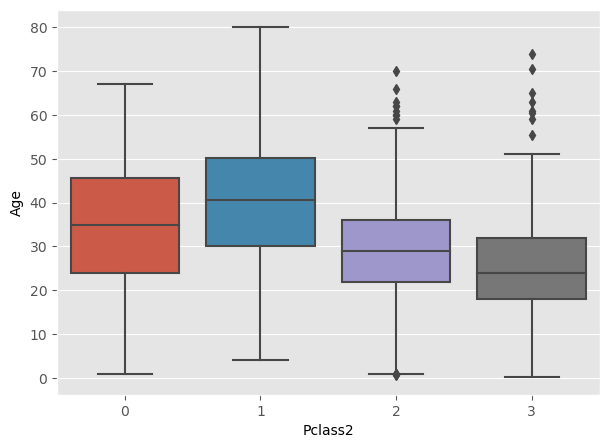

In [94]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df)

In [95]:
all_df[all_df["Age"]>15][["Pclass", "Age"]].groupby("Pclass").describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       276.0  40.056159  13.724680  16.0  29.0  39.0  50.0  80.0
2       233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3       422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<Axes: xlabel='Pclass2', ylabel='Age'>

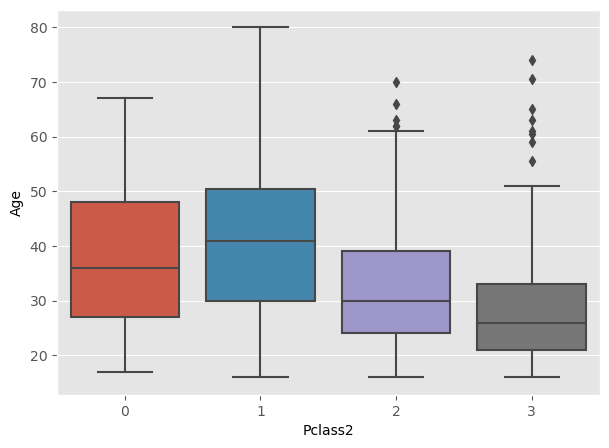

In [96]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df[all_df["Age"]>15])

<Axes: xlabel='Age', ylabel='Fare'>

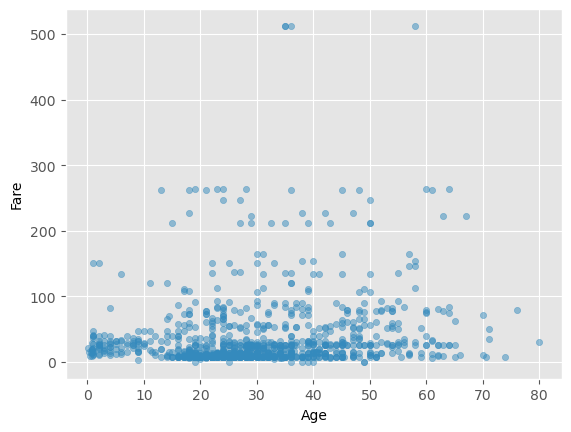

In [97]:
all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)


In [98]:
all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]
all_df[["Pclass2", "family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<Axes: xlabel='Pclass2', ylabel='family_num'>

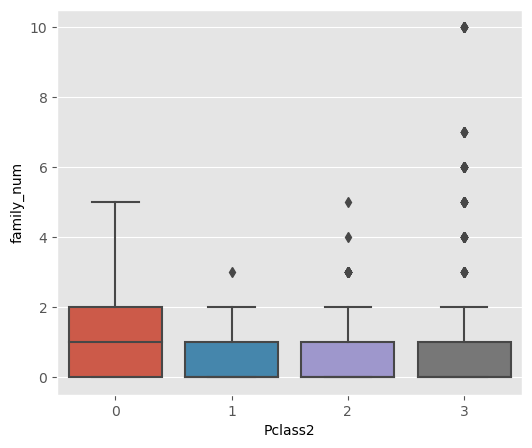

In [99]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="family_num", data=all_df)

<Axes: xlabel='Pclass2'>

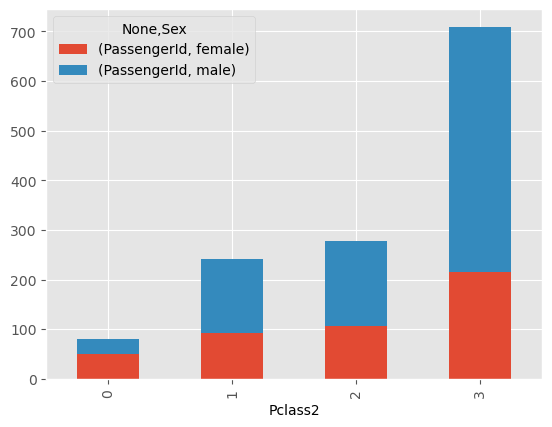

In [100]:
pclass_gender_df = all_df[["Pclass2", "Sex", "PassengerId"]].dropna().groupby(["Pclass2", "Sex"]).count().unstack()
pclass_gender_df.plot.bar(stacked=True)

In [101]:
pclass_gender_df["male_ratio"] = pclass_gender_df["PassengerId", "male"] / (pclass_gender_df["PassengerId", "male"] + pclass_gender_df["PassengerId", "female"])
pclass_gender_df


PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

<Axes: xlabel='Pclass2'>

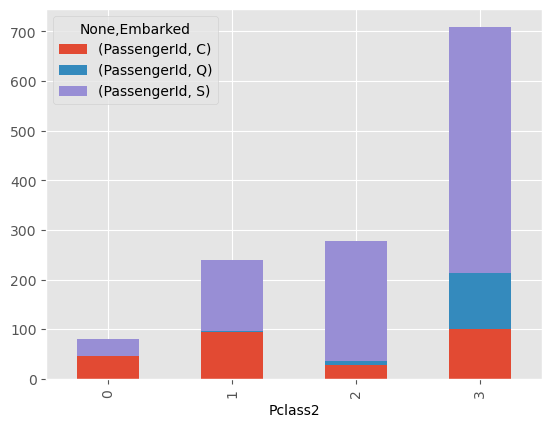

In [102]:
pclass_emb_df = all_df[["Pclass2", "Embarked", "PassengerId"]].dropna().groupby(["Pclass2", "Embarked"]).count().unstack()
pclass_emb_df = pclass_emb_df.fillna(0)
pclass_emb_df.plot.bar(stacked=True)

In [103]:
pclass_emb_df_ratio = pclass_emb_df.copy()
pclass_emb_df_ratio["sum"] = pclass_emb_df_ratio["PassengerId", "C"] + pclass_emb_df_ratio["PassengerId", "Q"] + pclass_emb_df_ratio["PassengerId", "S"]

pclass_emb_df_ratio["PassengerId", "C"] = pclass_emb_df_ratio["PassengerId", "C"] / pclass_emb_df_ratio["sum"]
pclass_emb_df_ratio["PassengerId", "Q"] = pclass_emb_df_ratio["PassengerId", "Q"] / pclass_emb_df_ratio["sum"]
pclass_emb_df_ratio["PassengerId", "S"] = pclass_emb_df_ratio["PassengerId", "S"] / pclass_emb_df_ratio["sum"]
pclass_emb_df_ratio = pclass_emb_df_ratio.drop(["sum"], axis=1)


In [104]:
pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

<Axes: xlabel='Pclass2'>

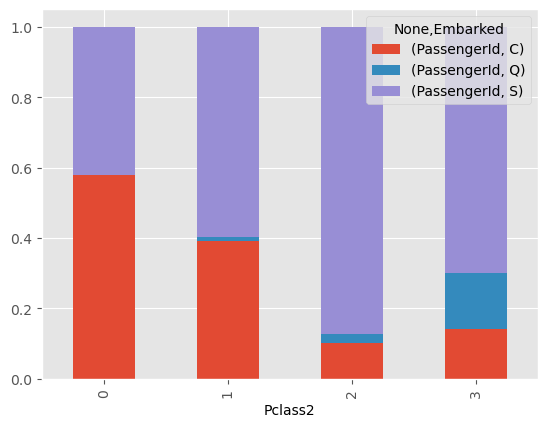

In [105]:
pclass_emb_df_ratio.plot.bar(stacked=True)

In [106]:
c_young10 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] //10 ==1) & (all_df["family_num"]==0)]
len(c_young10)

7

In [107]:
c_young20 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] //10 ==2) & (all_df["family_num"]==0)]
len(c_young20)

31

<Axes: xlabel='Age', ylabel='Fare'>

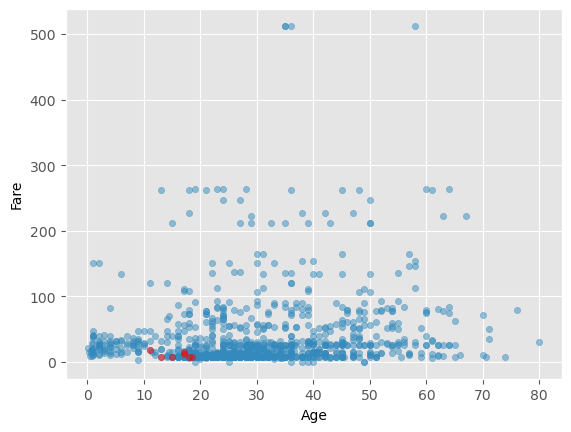

In [108]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
c_young10.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

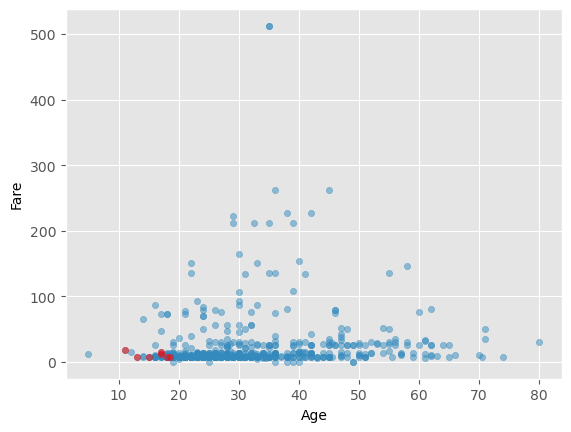

In [109]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x="Age", y="Fare", alpha=0.5)
c_young10.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

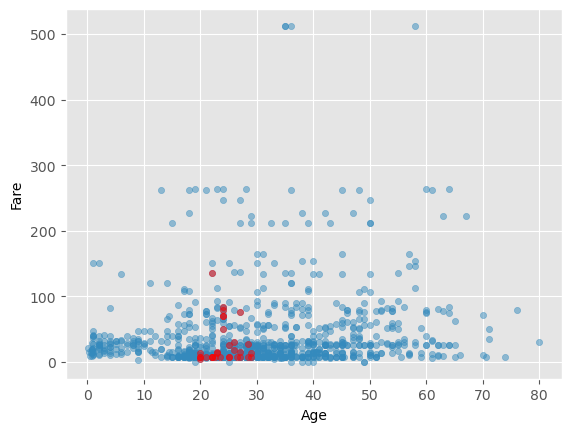

In [110]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
c_young20.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

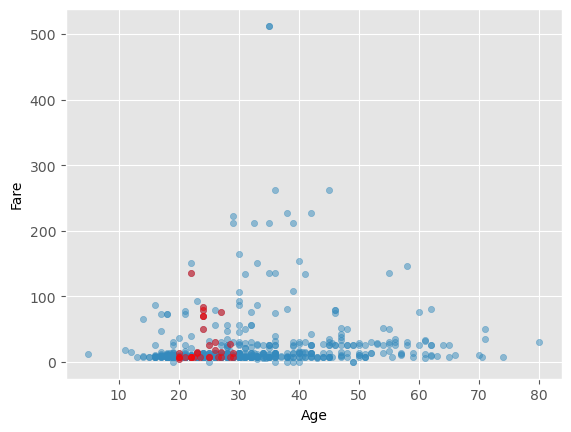

In [111]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x="Age", y="Fare", alpha=0.5)
c_young20.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<Axes: xlabel='Age', ylabel='Fare'>

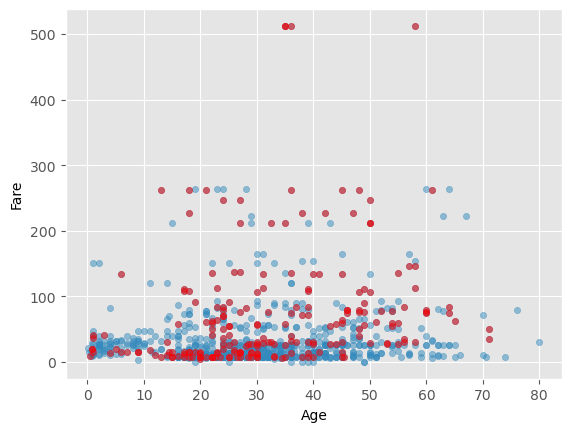

In [112]:
c_all = all_df[all_df["Embarked"]=="C"]
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
c_all.plot.scatter(x="Age", y="Fare", color="red", ax=ax, alpha=0.5)


In [113]:
all_df[(all_df["Age"] // 10 == 1) & (all_df["family_num"]==0)][["Embarked", "Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
